In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import explained_variance_score

import wrangle

In [2]:
df, train, validate, test = wrangle.wrangle_zillow()

### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [9]:
model = LinearRegression().fit(train[['calculatedfinishedsquarefeet']],train[['taxvaluedollarcnt']])
predictions = model.predict(train[['calculatedfinishedsquarefeet']])

In [10]:
train.loc[:,'yhat'] = predictions

### Plot the residuals for the linear regression model that you made.

In [11]:
train.loc[:,'yhat_res'] = train.yhat - train.taxvaluedollarcnt

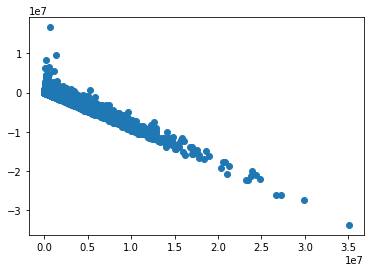

In [66]:
plt.scatter(train[['taxvaluedollarcnt']],train[['yhat_res']])

1. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.  
2. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [33]:
train['baseline_preds'] = train.taxvaluedollarcnt.mean()
train['baseline_res'] = train['baseline_preds'] - train['taxvaluedollarcnt']

In [34]:
sse_yhat = sum(train['yhat_res']**2)
sse_base = sum(train['baseline_preds']**2)
sse_yhat, sse_base

(1.5386766766765565e+17, 1.9419703390726077e+17)

In [35]:
mse_yhat = sse_yhat / len(train)
mse_base = sse_base / len(train)
mse_yhat,mse_base

(133743079073.33307, 168797705556.7287)

In [48]:
df.shape

(2054416, 7)

In [36]:
rmse_yhat = sqrt(mse_yhat)
rmse_base = sqrt(mse_base)
rmse_yhat, rmse_base

(365709.0087396441, 410849.9793802218)

### Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [37]:
if sse_yhat < sse_base:
    print('Our model performs better than the baseline')
else:
    print('Our model DOES NOT perform better than the baseline')

Our model performs better than the baseline


### What is the amount of variance explained in your model?

In [38]:
train['yhat_mean_res'] = train['yhat'] - train['baseline_preds']
train['yhat_mean_res_squared'] = train['yhat_mean_res'] ** 2

In [44]:
ess_base = 0
ess_yhat = train['yhat_mean_res_squared'].sum()
ess_yhat

6.1594832006603096e+16

In [41]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,yhat,yhat_res,baseline_preds,baseline_res,yhat_mean_res,yhat_mean_res_squared
1742277,3.0,2.0,1399.0,185672.0,1977.0,2388.72,6059.0,297457.108117,111785.108117,410849.979378,225177.979378,-113392.871261,1.285794e+10
1384115,3.0,2.0,2128.0,397599.0,1968.0,4660.54,6037.0,511967.931018,114368.931018,410849.979378,13250.979378,101117.951640,1.022484e+10
1251790,3.0,2.0,1224.0,793679.0,1964.0,8945.97,6037.0,245962.740479,-547716.259521,410849.979378,-382829.020622,-164887.238899,2.718780e+10
918867,3.0,2.0,1616.0,245569.0,1933.0,3026.18,6037.0,361310.123987,115741.123987,410849.979378,165280.979378,-49539.855391,2.454197e+09
410924,4.0,3.0,2652.0,470778.0,1977.0,5850.57,6037.0,666156.780401,195378.780401,410849.979378,-59928.020622,255306.801023,6.518156e+10


In [45]:
tss_baseline = sse_base + ess_base
tss_yhat = sse_yhat + ess_yhat

In [46]:
ess_baseline / tss_baseline

0.0

In [47]:
ess_yhat / tss_yhat

0.2858726325913957

Is your model better than the baseline model?

Yes, our R^2 is greater and RMSE smaller for our model compared to baseline


In [64]:
def plot_residuals(y,yhat):
    '''
    y is the variable you're using to make your prediction
    yhat is the residual from your predictions
    '''
    import matplotlib.pyplot as plt
    res = yhat-y
    plt.scatter(y,res)
    plt.show()  

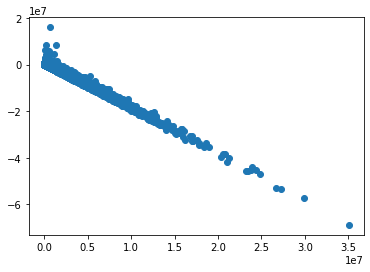

In [65]:
plot_residuals(train['taxvaluedollarcnt'],train['yhat_res'])

In [73]:

def regression_errors(y, yhat):
    '''
    This function takes in actual value and predicted value 
    then outputs: the sse, ess, tss, mse, and rmse
    '''
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = math.sqrt(MSE)
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    
    return MSE, SSE, RMSE, ESS, TSS

In [74]:
regression_errors(train.taxvaluedollarcnt,train.yhat)

(133743079073.33705,
 1.5386766766766022e+17,
 365709.00873964955,
 6.1594832006603096e+16,
 2.1546249967426333e+17)

In [72]:
def regression_errors_print(y, yhat):
    '''
    This function takes in actual value and predicted value 
    then outputs: the sse, ess, tss, mse, and rmse
    '''
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = math.sqrt(MSE)
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
        
    print(f''' 
        SSE: {SSE: .4f}
        ESS: {ESS: .4f}
        TSS: {TSS: .4f}
        MSE: {MSE: .4f}
        RMSE: {RMSE: .4f}
        ''')